# Lecture 21 - Linear Regression Part 2

Today we'll work through more properties and ideas surrounding linear regression. As with previous lectures, we will explore concepts mainly in this notebook, but you can also refer to the slides for a more concise presentation.

In [1]:
## Import packages

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import seaborn as sns

print("Done importing packages :)")

Done importing packages :)


In [2]:
## To start we use protein expression v mrna
data1 = pd.read_excel("data/41586_2011_BFnature10098_MOESM304_ESM.xls")

# Drop rows with NA values
#df.apply (pd.to_numeric, errors='coerce')
#data1.dropnan()
data2 = data1.filter(["mRNA copy number average [molecules/cell]","Protein copy number average [molecules/cell]"])
data2.apply(pd.to_numeric, errors='coerce')
data2.dropna()

,mRNA copy number average [molecules/cell],Protein copy number average [molecules/cell]
2,2187.76,1.201244e+08
5,12.79,3.395867e+07
6,3229.54,3.563218e+07
7,1825.51,2.437155e+07
8,2247.05,2.419042e+07
...,...,...
5022,11.04,1.205260e+03
5023,2.59,6.137000e+01
5024,11.87,2.653200e+02
5025,5.36,2.126900e+02


In [3]:

## Randomly sample 30 genes and plot scatter plot
rna_protein_data = np.array(data2.dropna().sample(30))

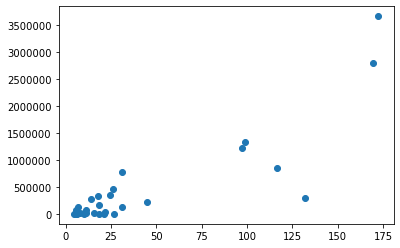

In [4]:
plt.scatter(rna_protein_data[:, 0], rna_protein_data[:, 1])

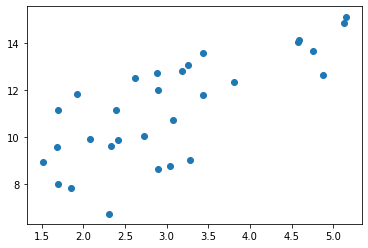

In [5]:
# Transform?
plt.scatter(np.log(rna_protein_data[:, 0]),np.log(rna_protein_data[:, 1]))

In [6]:
rna_protein_data[:, 0]

array([ 97.36, 131.92,  17.9 ,  11.26, 116.53, 172.49,  18.06,  30.97,
        20.85,   4.55,  15.33,   8.02,  30.93,  10.01,   5.36,  18.18,
         5.46,  45.07,  26.73,  25.88,  24.23,  13.69, 169.6 ,  10.3 ,
         6.89,  21.79,  10.92,   5.48,  98.87,   6.34])

In [7]:
jump_data = pd.read_excel("data/student_data.xlsx")
height = np.array(jump_data["What is your height in inches? Ex. 67"])
jump1 = np.array(jump_data["Standing long jump: How far can you jump from a standing position? Measure from your toes at standing to the back of your heels when you land. Take one practice jump. Okay now do a real jump. Record your jump distance in inches. (fyi, the record is held by Byron Jones for a jump of 146.75 inches.)"])
jump2 = np.array(jump_data["Do a second real jump just like in the previous question. Record your jump distance in inches."])


jump_data.iloc[0]


Timestamp                                                                                                                                                                                                                                                                                                     2020-04-09 10:07:00.296000
What is your height in inches? Ex. 67                                                                                                                                                                                                                                                                                                 69
Standing long jump: How far can you jump from a standing position? Measure from your toes at standing to the back of your heels when you land. Take one practice jump. Okay now do a real jump. Record your jump distance in inches. (fyi, the record is held by Byron Jones for a jump of 146.75 inches.)                          50.2
Do a second r

In [12]:
height

array([69. , 63. , 71. , 66. , 71. , 61. , 67. , 65. , 64. , 66. , 74. ,
       68. , 67. , 68. , 67. , 73. , 62. , 75. , 68. , 66. , 64. , 67. ,
       69. , 67. , 69. , 75. , 67. , 60. , 72. , 63. , 75.5, 68. , 66. ,
       61. , 70. , 62. , 62. , 63. , 65. , 68. , 63.5, 69. , 52. , 69. ,
       71.5, 73. , 70. , 65. , 64. , 64. ])